In [ ]:
from src.experiment import ExperimentFramework
from src.viz import Visualizer

# define data directory
data_dir = 'data/daily_cluster_matrices_min_6'

# initialize experiment 
experiment = ExperimentFramework(data_dir)

# run experiment
n_samples = 2
n_days = 60


experiment_summary = experiment.run_experiment(n_samples=n_samples, n_days=n_days)
print(f"\n{experiment_summary['total_results']} results")

# initialize visualizer
analyzer = experiment.analyzer
analyzer.exclude_results(min_communities=2, max_communities=6)
viz = Visualizer(analyzer)

initializing media bias experiment...
loading 241 daily matrices...
loaded 241 datasets
241 daily files loaded

running experiment: 2 samples × 60 days...

=== starting experiment: 2 samples x 60 days ===

running sample: sample_00
created sample 'sample_00' with 60 days, shape: (49, 15862)
set data: 49 entities, 15862 clusters
built cooccurrence adjacency: (49, 49)
built jaccard adjacency: (49, 49)
built dice adjacency: (49, 49)
built cosine adjacency: (49, 49)
built correlation adjacency: (49, 49)
built pmi adjacency: (49, 49)
built lift adjacency: (49, 49)
built tfidf_similarity adjacency: (49, 49)
built conditional_probability adjacency: (49, 49)

processing cooccurrence adjacency matrix...
louvain params_0: 5 communities
louvain params_1: 3 communities
louvain params_2: 12 communities
leiden params_0: 2 communities
label_propagation params_0: 1 communities
girvan_newman params_0: 2 communities
infomap params_0: 1 communities
  Infomap v2.8.0 starts at 2025-06-03 16:51:31
  -> Inpu

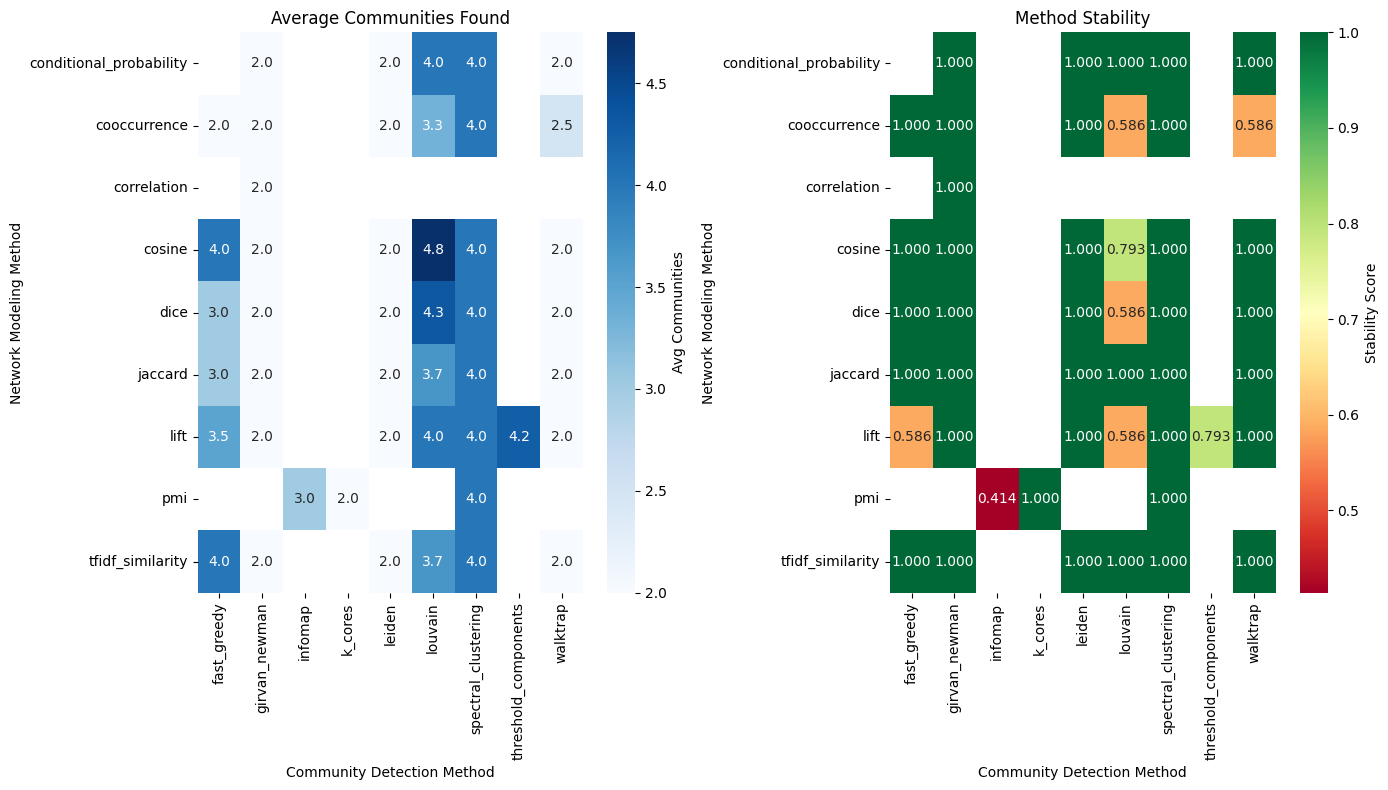

In [3]:
# method stability
# viz.plot_stability_ranking(top_n=15) # extremely uninformative
viz.plot_method_comparison()


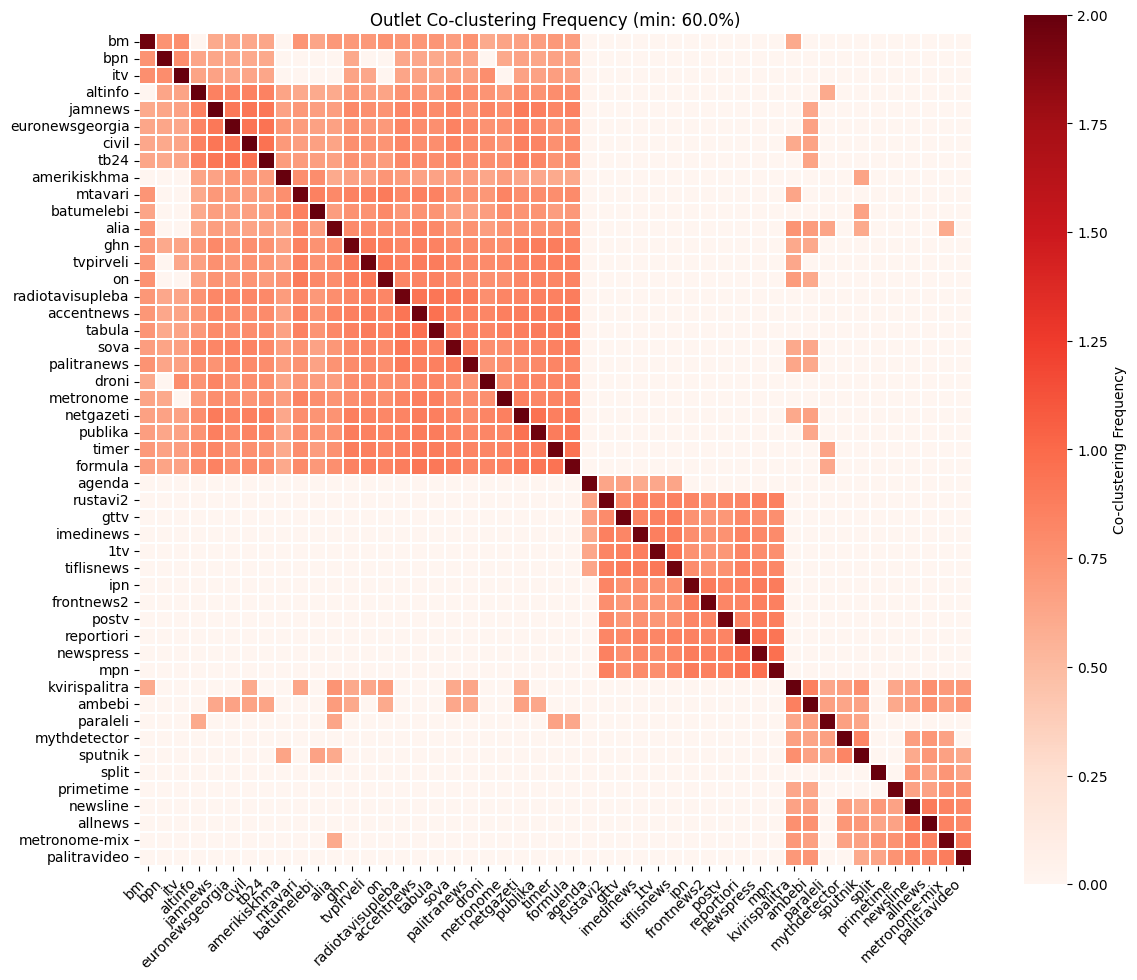


Outlet Co-clustering Analysis:
• Outlets analyzed: 49
• Pairs above 60.0% threshold: 440
• Mean co-clustering frequency: 0.757
• Max co-clustering frequency: 0.966


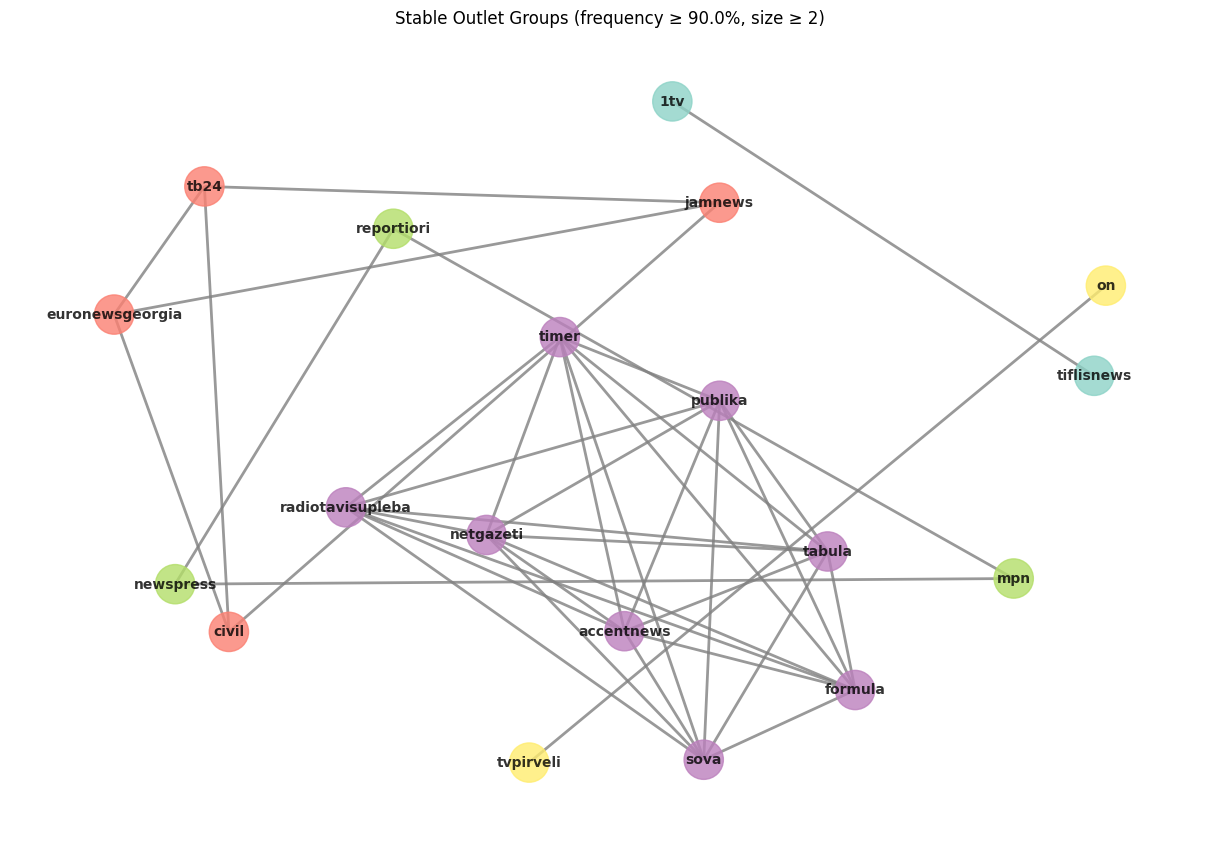


Stable Outlet Groups Found (5):
--------------------------------------------------
1. stable_group_1:
   Size: 2 outlets
   Members: 1tv, tiflisnews

2. stable_group_4:
   Size: 4 outlets
   Members: civil, euronewsgeorgia, jamnews, tb24

3. stable_group_5:
   Size: 3 outlets
   Members: mpn, newspress, reportiori

4. stable_group_10:
   Size: 8 outlets
   Members: accentnews, formula, netgazeti, publika, radiotavisupleba, sova, tabula, timer

5. stable_group_12:
   Size: 2 outlets
   Members: on, tvpirveli



In [14]:

# community structure discovery
viz.plot_outlet_cooccurrence(min_frequency=0.6)
# stable outlet groups
viz.plot_stable_outlet_groups(frequency_threshold=0.9, min_group_size=2)


In [ ]:
# cross-method agreement
samples = experiment.data.list_samples()
if samples:
    sample_id = samples[0]
    sample_results = experiment.analyzer.get_results({'sample_id': sample_id})
    network_methods = sample_results['network_method'].unique()
    print(f"\nanalyzing method agreement for {sample_id}...")
    for network_method in network_methods[:2]:
        print(f"\nmethod similarity for {network_method}:")
        viz.plot_method_similarity(sample_id, network_method)


In [ ]:

# summary
stability = experiment.analyzer.analyze_stability()
if not stability.empty:
    best_method = stability.iloc[0]
    print(f"most stable method: {best_method['network_method']} + {best_method['community_method']}")
    print(f"stability score: {best_method['stability_score']:.3f}")
    print(f"average communities: {best_method['mean']:.1f} ± {best_method['std']:.1f}")

stable_groups = experiment.analyzer.find_stable_outlet_groups(frequency_threshold=0.7)
print(f"stable outlet groups found: {len(stable_groups)}")
if stable_groups:
    print("top groups:")
    for i, (group_name, outlets) in enumerate(list(stable_groups.items())[:3], 1):
        print(f"{i}. {group_name}: {', '.join(outlets)}")

if samples:
    print(f"method agreement analysis available for {len(samples)} samples")

print(f"\nanalysis complete")
print(f"{experiment_summary['total_results']} results analyzed")
print(f"results exported to: streamlined_results.csv")
